# Handwritten Digit Recognition with Convolutional Neural Network (CNN)

This Python code implements a Convolutional Neural Network (CNN) for recognizing handwritten digits from the MNIST dataset. The code uses TensorFlow and Keras for building and training the neural network.

This code demonstrates building and training a CNN for handwritten digit recognition using the MNIST dataset. The model's performance can be further evaluated on test data.

# Loading and Preprocessing the Data

The MNIST dataset is loaded using TensorFlow's tf.keras.datasets.mnist.
The dataset is normalized and reshaped to be suitable for CNN input.

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

# Exploratory Data Analysis

Sample images from the dataset are displayed using matplotlib.

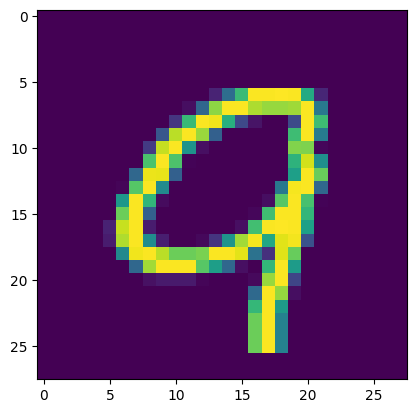

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3000])
plt.show()

In [7]:
print(x_train[3000])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  25  91 174 254 254
  255 254 156  27   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   9  84 212 254 254 224 216
  216 219 254 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  39 172 254 250 161  5

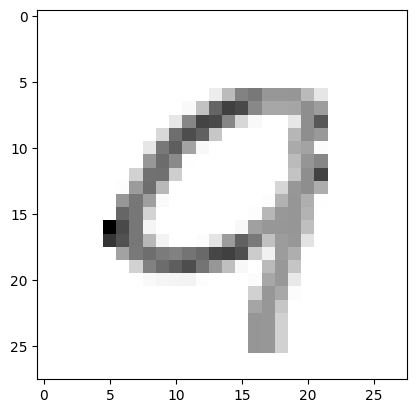

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[3000],cmap=plt.cm.binary)

In [9]:
print(x_train[3000])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[3000])

9


# Data Preprocessing

Images are reshaped and normalized for input to the CNN model.

In [11]:
import numpy as np

i=28
x_trainr=np.array(x_train).reshape(-1,i,i,1)
x_testr=np.array(x_test).reshape(-1,i,i,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


# Building the CNN Model
A CNN model is constructed using Keras Sequential API.
The model architecture consists of convolutional layers, max-pooling layers, and dense layers.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [16]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


# Compiling and Training the Model
The model is compiled with a specific loss function, optimizer, and evaluation metric.
Training is performed on the training data for a specified number of epochs.

In [17]:
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [18]:
hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 30s 17ms/step - loss: 0.2434 - accuracy: 0.9230 - val_loss: 0.0945 - val_accuracy: 0.9698
Epoch 2/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0738 - accuracy: 0.9772 - val_loss: 0.0611 - val_accuracy: 0.9821
Epoch 3/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0621 - val_accuracy: 0.9815
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0516 - val_accuracy: 0.9840
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0480 - val_accuracy: 0.9863
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0495 -

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
hist.history

{'loss': [0.24337735772132874,
  0.07376335561275482,
  0.05049503967165947,
  0.03866446018218994,
  0.03174227476119995,
  0.023827530443668365,
  0.01855776272714138,
  0.015408762730658054,
  0.013649579137563705,
  0.010635226033627987],
 'accuracy': [0.9229999780654907,
  0.9771875143051147,
  0.984333336353302,
  0.9878333210945129,
  0.9898541569709778,
  0.9921249747276306,
  0.9938541650772095,
  0.9946458339691162,
  0.9953749775886536,
  0.9960625171661377],
 'val_loss': [0.09445551782846451,
  0.061067331582307816,
  0.06205166131258011,
  0.05157935619354248,
  0.044026803225278854,
  0.04803188145160675,
  0.049500320106744766,
  0.046251021325588226,
  0.0476657934486866,
  0.04928787797689438],
 'val_accuracy': [0.9698333144187927,
  0.9820833206176758,
  0.9815000295639038,
  0.984000027179718,
  0.9868333339691162,
  0.9863333106040955,
  0.9861666560173035,
  0.987416684627533,
  0.9883333444595337,
  0.9877499938011169]}

# Model Evaluation and Visualization
Training accuracy and loss are visualized over epochs using matplotlib.

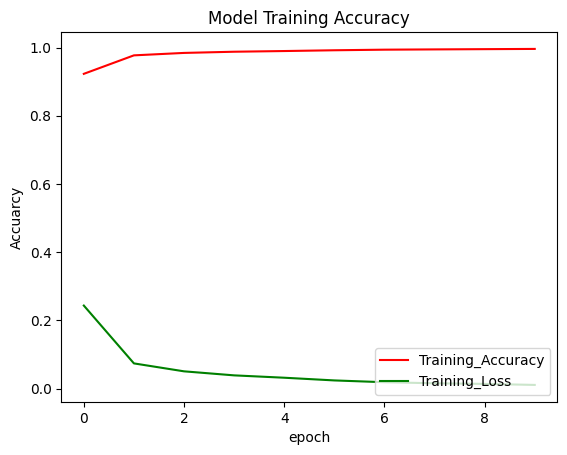

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

# The Accuracy of the model dataset to recognize number using MNIST is 96.98%